In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load your dataset
# Replace 'supply_chain_data.csv' with the actual path to your dataset
data = pd.read_csv("Final_product_dataset.csv")

# Check for missing values and handle them if needed
print(data.isnull().sum())
data = data.dropna()  # Example: Drop rows with missing values

# Features and target variable
X = data[
    ["quantity", "price_per_unit", "Supplier Reliability", "Inventory Level (%)", "Transportation Risk", "Demand Variability"]
]
y = data["Risk Factor"]  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of trees
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Example: Predict risk factor for a new record
new_data = pd.DataFrame({
    'quantity': [100],  # Example data
    'price_per_unit': [50],
    'Supplier Reliability': [0.95],
    'Inventory Level (%)': [75],
    'Transportation Risk': [0.1],
    'Demand Variability': [0.2]
})
predicted_risk = xgb_model.predict(new_data)
print("Predicted Risk Factor:", predicted_risk[0])


id                      0
customer_name           0
product_name            0
quantity                0
price_per_unit          0
purchase_date           0
Supplier                0
Supplier Reliability    0
Inventory Level (%)     0
Transportation Risk     0
Demand Variability      0
Risk Factor             0
dtype: int64
Mean Squared Error: 0.7675703935243255
R^2 Score: 0.803723015406311
Predicted Risk Factor: 2.5443583


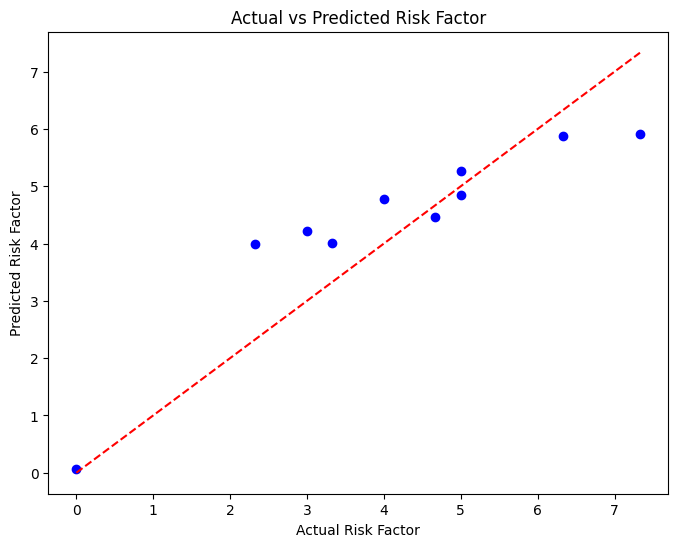

In [11]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Risk Factor')
plt.ylabel('Predicted Risk Factor')
plt.title('Actual vs Predicted Risk Factor')
plt.show()